__Imports__

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

__Read the modeling file and create a pandas dataframe__

In [17]:
model = pd.read_csv('./dataset_diabetes/diabetic_data_modeling.csv')
model.head()

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,change,diabetesMed,readmitted,age_range
0,0,0,0,[10-20),0,0,0,3,59,0,...,0,0,0,0,2,0,0,1,1,1
1,1,1,0,[20-30),0,0,0,2,11,5,...,1,0,0,0,0,0,1,1,0,2
2,2,0,1,[30-40),0,0,0,2,44,1,...,0,0,0,0,2,0,0,1,0,4
3,3,0,1,[40-50),0,0,0,1,51,0,...,1,0,0,0,1,0,0,1,0,5
4,4,0,1,[50-60),2,0,2,3,31,6,...,0,0,0,0,1,0,1,1,1,6


In [18]:
model.drop('Unnamed: 0', axis =1, inplace = True)

In [19]:
model.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'age_range'],
      dtype='object')

In [20]:
model.dtypes

race                         int64
gender                       int64
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                       int64
diag_2                       int64
diag_3                       int64
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
glimepiride                  int64
glipizide                    int64
glyburide                    int64
pioglitazone                 int64
rosiglitazone                int64
insulin                      int64
glyburide-metformin 

__Baseline__

In [21]:
y.value_counts(normalize = True)

0    0.532002
1    0.467998
Name: readmitted, dtype: float64

In [22]:
# create X (features) and y (target)
X = model.drop(['readmitted', 'age'], axis=1)
y = model['readmitted']

__Train/Test Split__

In [23]:
# split X and y into cross-validation (80%) and testing (20%) data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=123, stratify = y)

__Scaling of data__

In [24]:
# Instantiate.
ss = StandardScaler()

# Fit and transform.
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

__LOGISTIC REGRESSION__

In [25]:
# Instantiate.
lr = LogisticRegression()

#Fit model
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [26]:
#Evaluation Metrics
print(f'Training Accuracy Score: {lr.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {lr.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(lr,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.6183549989431409
Testing Accuracy Score: 0.617998309025576
Cross Validation Score: 0.6181831924212993


In [27]:
preds = lr.predict(X_test_sc)

__Confusion Matrix__

True Positives (TP): we correctly predicted that they do have diabetes

True Negatives (TN): we correctly predicted that they don't have diabetes

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [28]:
# Generate confusion matrix.
confusion_matrix(y_test, preds)

array([[7855, 2213],
       [5016, 3840]])

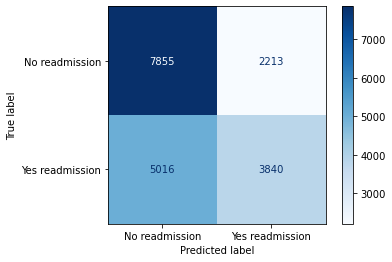

In [29]:
# Plot confusion matrix.
metrics.plot_confusion_matrix(lr, X_test_sc, y_test, cmap='Blues', 
                      values_format='d', display_labels=['No readmission', 'Yes readmission']);

Sensitivity (Recall): How "sensitive" is the classifier to detecting positive instances? TP/(TP+FN)

In [30]:
print(f'Recall Score: {metrics.recall_score(y_test, preds)}')

Recall Score: 0.43360433604336046


__KNN MODELING__

In [31]:
# Instantiate and fit model
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [ ]:
print(f'Training Accuracy Score: {knn.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {knn.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(knn,X_train_sc,y_train).mean()}')

In [ ]:
preds_knn = knn.predict(X_test_sc)

__Confusion Matrix__

In [ ]:
# Generate confusion matrix.
confusion_matrix(y_test, preds_knn)

In [ ]:
# Plot confusion matrix.
metrics.plot_confusion_matrix(knn, X_test_sc, y_test, cmap='Reds', 
                      values_format='d', display_labels=['No readmission', 'Yes readmission']);

Sensitivity (Recall): How "sensitive" is the classifier to detecting positive instances? TP/(TP+FN)

In [ ]:
print(f'Recall Score: {metrics.recall_score(y_test, preds_knn)}')

__RANDOM FOREST__

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_sc, y_train)

In [ ]:
print(f'Training Accuracy Score: {rf.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {rf.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(rf,X_train_sc,y_train).mean()}')

In [ ]:
preds_rf = rf.predict(X_test_sc)

__Confusion Matrix__

In [ ]:
# Generate confusion matrix.
confusion_matrix(y_test, preds_rf)

In [ ]:
# Plot confusion matrix.
metrics.plot_confusion_matrix(rf, X_test_sc, y_test, cmap='Greens', 
                      values_format='d', display_labels=['No readmission', 'Yes readmission']);

Sensitivity (Recall): How "sensitive" is the classifier to detecting positive instances? TP/(TP+FN)

In [ ]:
print(f'Recall Score: {metrics.recall_score(y_test, preds_rf)}')

__Most Important Features Using a Decision Tree__

In [ ]:
# decision tree for feature importance on a regression problem
dt = DecisionTreeClassifier(max_depth = 25, criterion = "entropy", max_features=None, min_samples_split=5)
dt.fit(X_train, y_train)

In [ ]:
feature_names = X_train.columns

In [ ]:
importance = dt.feature_importances_

In [ ]:
most_imp_features = pd.DataFrame([f for f in zip(feature_names,importance)], columns=["Feature", "Importance"]).nlargest(5, "Importance")

In [ ]:
most_imp_features 

In [ ]:
# plot the result
plt.figure(figsize=(8,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8, color ='pink')
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=12)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show();

[Graphing Source](https://www.kaggle.com/iabhishekofficial/prediction-on-hospital-readmission/notebook)

In [41]:
X_lm = model[['num_lab_procedures','num_medications','time_in_hospital','diag_2','diag_3','diag_1','age_range','number_inpatient','number_diagnoses','num_procedures']]
y_lm = model['readmitted']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_lm, y_lm, test_size =0.20, random_state=123, stratify = y)

In [43]:
# Instantiate.
ss = StandardScaler()
# Fit and transform.
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [44]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [45]:
print(f'Training Accuracy Score: {lr.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {lr.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(lr,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.6089621644472627
Testing Accuracy Score: 0.609279222151765
Cross Validation Score: 0.6082751766697734


In [46]:
# Instantiate.
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [47]:
print(f'Training Accuracy Score: {knn.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {knn.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(knn,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.7169863665187064
Testing Accuracy Score: 0.5641513422109491
Cross Validation Score: 0.560267388339651


In [48]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [49]:
print(f'Training Accuracy Score: {rf.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {rf.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(rf,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.9998282604100613
Testing Accuracy Score: 0.5973367152821814
Cross Validation Score: 0.593016782483203


Evaluating the importance of different features resulted in the 10 features displayed above. 

__PRINCIPAL COMPONENT ANALYSIS__

In [63]:
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [64]:
X = model.drop(['readmitted', 'age'], axis=1)
y = model['readmitted']

In [65]:
# Instantiate.
ss = StandardScaler()
# Fit and transform.
X_sc = ss.fit_transform(X)

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components = 2).fit(X_sc)

In [68]:
X_pca = pca.transform(X_sc)

In [69]:
pca.explained_variance_ratio_

array([0.08442655, 0.06561478])

In [70]:
X_pca.shape

(94620, 2)

In [71]:
# fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(pca.explained_variance_ratio_, lw=2)
# ax.scatter(pca.explained_variance_ratio_, s=100)
# ax.set_title('explained variance of components')
# ax.set_xlabel('principal component')
# ax.set_ylabel('explained variance');

In [72]:
# pca_component_1_evec = pca.components_[0]

# for weight, event in zip(pca_component_1_evec, X_sc.iloc[:,1:].columns):
    
#     print(event, weight)

In [73]:
pca_df = pd.DataFrame(pca.transform(X_sc))
pca_df.head()

,0,1
0,1.205650,-1.350671
1,-1.172619,-0.227735
2,0.639485,-0.584678
3,-0.079525,-0.441028
4,-0.830395,1.721952


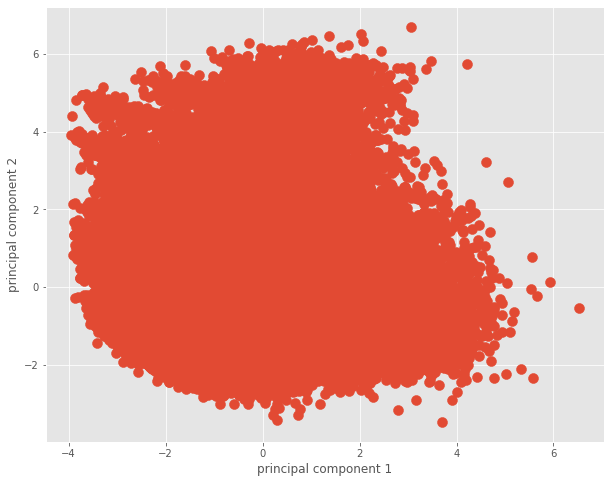

In [74]:
# fig, ax = plt.subplots(figsize=(10,8))
# ax.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], s=100)
# ax.set_xlabel('principal component 1')
# ax.set_ylabel('principal component 2');

In [75]:
pca_lr = LogisticRegression()

In [76]:
print(f'Cross Validation Score: {cross_val_score(pca_lr,X_pca,y).mean()}')

Cross Validation Score: 0.5512365250475586


In [77]:
pca_knn = knn = KNeighborsClassifier()

In [78]:
print(f'Cross Validation Score: {cross_val_score(pca_knn,X_pca,y).mean()}')

Cross Validation Score: 0.5195096174170366


In [79]:
pca_rf = RandomForestClassifier(n_estimators=100)

In [80]:
print(f'Cross Validation Score: {cross_val_score(pca_rf,X_pca,y).mean()}')

Cross Validation Score: 0.5166138237159162


__GRID SEARCHING__

In [105]:
# create X (features) and y (target)
X = model.drop(['readmitted', 'age'], axis=1)
y = model['readmitted']

In [106]:
# split X and y into cross-validation (80%) and testing (20%) data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=123, stratify = y)

__Logistic Regression__

In [107]:
lr_params = {'penalty': ['l1','l2'],
             "C": [1,.2,.80],
            'n_jobs':[-1]}

In [111]:
# Instantiate our GridSearchCV object.
lr_grid = GridSearchCV(LogisticRegression(),
                              lr_params, 
                              cv=5, 
                              verbose=1)
lr_grid.fit(X_train_sc, y_train)
#Print the best score 
print(lr_grid.best_score_)
# Print out the set of hyperparameters that achieved the best score.
print(lr_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.6082883867094034
{'C': 0.2, 'n_jobs': -1, 'penalty': 'l2'}


In [113]:
print(f'Score on training set: {lr_grid.score(X_train_sc, y_train)}')
print(f'Score on testing set: {lr_grid.score(X_test_sc, y_test)}')
scores = cross_val_score(lr_grid, 
                         X_train_sc, y_train,
                         cv = 10,
                         n_jobs=-1)

print(f'Accuracy: {scores.mean()}')

Score on training set: 0.6089489537095751
Score on testing set: 0.609279222151765
Accuracy: 0.6086714860884442


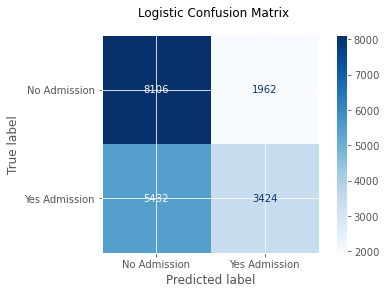

Recall Score: 0.3866305329719964


In [116]:
preds_lr = lr_grid.predict(X_test_sc)
disp = plot_confusion_matrix(lr_grid, X_test_sc, y_test, cmap = 'Blues',display_labels = ['No Admission', 'Yes Admission'])
disp.figure_.suptitle("Logistic Confusion Matrix")
plt.show();
print(f'Recall Score: {metrics.recall_score(y_test, preds_lr)}') 

__KNN__

In [117]:
knn_params = {
    'n_neighbors': range(2,4,10),
    'weights': ['uniform','distance'],
    'leaf_size': [10,20,30],
    'metric': ['euclidean', 'manhattan'],
    'n_jobs':[-1]}

In [119]:
# Instantiate our GridSearchCV object.
knn_grid = GridSearchCV(KNeighborsClassifier(), 
                              knn_params, 
                              cv=5, 
                              verbose=1)

knn_grid.fit(X_train_sc, y_train)
#Print the best score 
print(knn_grid.best_score_)
# Print out the set of hyperparameters that achieved the best score.
print(knn_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.5537280216973091
{'leaf_size': 5, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 2, 'weights': 'uniform'}


In [120]:
print(f'Score on training set: {knn_grid.score(X_train_sc, y_train)}')
print(f'Score on testing set: {knn_grid.score(X_test_sc, y_test)}')
scores = cross_val_score(knn_grid, 
                         X_train_sc, y_train,
                         cv = 10,
                         n_jobs=-1)

print(f'Accuracy: {scores.mean()}')

Score on training set: 0.7708993870217713
Score on testing set: 0.5555379412386388
Accuracy: 0.556066355971561


In [121]:
preds_knn = knn_grid.predict(X_test)
disp = plot_confusion_matrix(knn_grid, X_test_sc, y_test, cmap = 'Reds',display_labels = ['No Admission', 'Yes Admission'])
disp.figure_.suptitle("KN Confusion Matrix")
plt.show();
print(f'Recall Score: {metrics.recall_score(y_test, preds_knn)}') 

ValueError: query data dimension must match training data dimension

__Random Forest Classifier__

In [125]:
rf_params = {
    "criterion":['gini','entropy'],
    "n_estimators": [100,200,500],
    "max_features": [2,5,10,15],
    "max_depth": [3,6,9],
    "min_samples_split": [2,3],
    "max_samples":[0.7,0.9],
    "n_jobs": [-1]}

In [ ]:
#Instantiate our GridSearchCV object.
rf_grid= GridSearchCV(RandomForestClassifier(),
                              rf_params, 
                              cv=5, 
                              verbose=1)
rf_grid.fit(X_train_sc, y_train)
#Print the best score 
print(rf_grid.best_score_)
# Print out the set of hyperparameters that achieved the best score.
print(rf_grid.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [ ]:
print(f'Score on training set: {rf_grid.score(X_train_sc, y_train)}')
print(f'Score on testing set: {rf_grid.score(X_test_sc, y_test)}')

scores = cross_val_score(rf_grid, 
                         X_train_sc, y_train,
                         cv = 5,
                         n_jobs=-1)
print(f'Accuracy: {scores.mean()}')

In [ ]:
preds_rf = rf_grid.predict(X_test)
disp = plot_confusion_matrix(grid_rf, X_test_sc, y_test, cmap = 'Greens', display_labels = ['No Admission', 'Yes Admission'])
disp.figure_.suptitle("RF Confusion Matrix")
plt.show();
print(f'Recall Score: {metrics.recall_score(y_test, preds_rf)}') 

__CONCLUSIONS__

* Ten major features are found to have high impact on diabetes patient readmission: number of lab test performed per patient, the number of procedures apart from lab tests conduct, number of medications administered, time a patient spends in the hospital, primary diagnosis, secondary diagnosis, additional diagnosis, total number of diagnoses entered into the system, age, and the number of inpatient visits in the year preceding the encounter. 

* The Random Forest Classifier achieved a 0.62 accuracy score and 0.xx AUC score. The recall or sensitivity score of the 